In [46]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
agm=pd.read_csv("agm_file.csv")

In [59]:
agm.isnull().sum()

Sl no.                       0
District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64

In [49]:
agm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sl no.                     8807 non-null   int64 
 1   District Name              8807 non-null   object
 2   Market Name                8807 non-null   object
 3   Commodity                  8807 non-null   object
 4   Variety                    8807 non-null   object
 5   Grade                      8807 non-null   object
 6   Min Price (Rs./Quintal)    8807 non-null   int64 
 7   Max Price (Rs./Quintal)    8807 non-null   int64 
 8   Modal Price (Rs./Quintal)  8807 non-null   int64 
 9   Price Date                 8807 non-null   object
dtypes: int64(4), object(6)
memory usage: 688.2+ KB


In [50]:
agm.corr()

,Sl no.,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Sl no.,1.000000,-0.206850,-0.213475,-0.224202
Min Price (Rs./Quintal),-0.206850,1.000000,0.989387,0.958207
Max Price (Rs./Quintal),-0.213475,0.989387,1.000000,0.946694
Modal Price (Rs./Quintal),-0.224202,0.958207,0.946694,1.000000


# Write a python script to fetch data of prices for the year 2020 (date wise from 1 st Jan’2020 to 31 st Dec’2020) for district “Agra” of Uttar Pradesh from the data sources
mentioned in the data section (can take point b as a reference). Following is the
output schema expected:

Price Date object file to datetime

In [51]:
agm["Price Date"]=pd.to_datetime(agm["Price Date"])


In [58]:
agm=agm.sort_values(by="Price Date")
agm=agm[agm["Price Date"].between('2020-01-01','2020-12-31')]

# b. Identify major markets for the district “Agra” and plot price patterns for each of them. What patterns do you identify?

In [ ]:
agm['Variety'].value_counts()

here desi and local are highest counts , potato,other  are not so important

In [ ]:
test=agm[0:8807]
table = pd.pivot_table(data=agm,index='Variety',values='Modal Price (Rs./Quintal)',aggfunc=np.sum)
table

desi has highest modal price

Text(0, 0.5, 'MODAL PRICE')

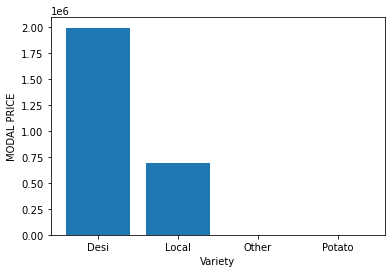

In [53]:
plt.bar(table.index,table['Modal Price (Rs./Quintal)'])
plt.xlabel('Variety') 
plt.ylabel('MODAL PRICE')

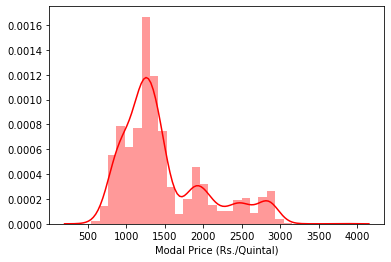

In [60]:
sns.distplot(test['Modal Price (Rs./Quintal)'], color = 'r')

#observatin is here right skewed and most of the data concentrated inbetween 900-1500 and outlier also  there

In [55]:
df1=agm["Market Name"]
df1=pd.value_counts(agm['Market Name'],ascending= False)
df1

Agra              1241
Achnera           1237
Fatehpur Sikri    1162
Khairagarh        1145
Jagnair           1124
Fatehabad         1093
Samsabad           968
Jarar              837
Name: Market Name, dtype: int64

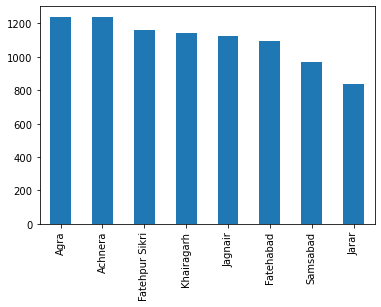

In [57]:
df1.plot(kind='bar')

in this diagram represting highest market is Achnera